<a href="https://colab.research.google.com/github/XaviPat01/MTL782_Data_Mining/blob/main/MTL782_Assignment1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTL782: Assignment 1, Question 2**
Members:
- Saurabh Jha, 2020MT10845
- Vishvesh Patel, 2020MT60896
- Avi Patni, 2020MT60159


## Step 1: **Importing Necessary Libraries**

In [ ]:
!pip install scikit-mlm
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from statistics import *
from keras.datasets import mnist
from sklearn.svm import SVC

## Step 2: **Load the MNIST Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Shape of training data", X_train.shape)
print("Shape of training labels", y_train.shape)
print("Shape of testing data", X_test.shape)
print("Shape os testing labels", y_test.shape)

In [ ]:
#Plotting the digits
fig = plt.figure(figsize=(10,7))
for i in range(45,60):
  ax = fig.add_subplot(3,5,i-45+1)
  ax.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label: {y}'.format(y=y_train[i]))
  plt.axis('off')

# Naive Bayes

To use Naive Bayes, we need to have a 2D Matrix as our input. Hence we needed to flatten X_train

In [ ]:
nb_X_train = X_train.flatten().reshape(60000,784)
nb_X_test = X_test.flatten().reshape(10000,784)

In [ ]:
nb = MultinomialNB()
nb.fit(nb_X_train, y_train)
y_predicted=nb.predict(nb_X_test)

Accuracy = 83.65 %
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



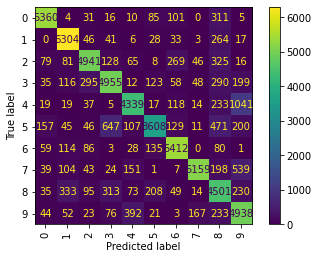

In [ ]:
print ("Accuracy = {} %".format(metrics.accuracy_score(y_test, y_predicted)*100))
print ("Classification Report \n {}".format(metrics.classification_report(y_test, y_predicted, labels=range(0,10))))
ConfusionMatrixDisplay.from_estimator(nb,nb_X_train,y_train,display_labels = range(0,10),xticks_rotation='vertical')
plt.show()

# KNN

In [ ]:
#from skmlm import NN_MLM
import matplotlib.colors as mcolors
# from sklearn.decomposition import PCA
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score

let's search for "k" using cross-validation

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scaled, the feature with a higher value range starts dominating when calculating distances. KNN which uses Euclidean distance is one such algorithm which essentially require scaling

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=1))
grid_k = {'kneighborsclassifier__n_neighbors':[5,7]}
cv = GridSearchCV(pipe_knn, param_grid = grid_k, scoring = 'precision_macro')
cv.fit(nb_X_train, y_train)
print(cv)

GridSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'kneighborsclassifier__n_neighbors': [5, 7]},
             scoring='precision_macro')


the best value for k is 7

In [ ]:
print(cv.cv_results_)

{'mean_fit_time': array([0.46269207, 0.55474458]), 'std_fit_time': array([0.07695285, 0.28671053]), 'mean_score_time': array([31.00234585, 37.49131975]), 'std_score_time': array([3.58529571, 4.41267629]), 'param_kneighborsclassifier__n_neighbors': masked_array(data=[5, 7],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'kneighborsclassifier__n_neighbors': 5}, {'kneighborsclassifier__n_neighbors': 7}], 'split0_test_score': array([0.97042919, 0.96898337]), 'split1_test_score': array([0.97045568, 0.97012068]), 'split2_test_score': array([0.96959808, 0.96683653]), 'split3_test_score': array([0.96840566, 0.96707616]), 'split4_test_score': array([0.96952252, 0.96889948]), 'mean_test_score': array([0.96968223, 0.96838324]), 'std_test_score': array([0.00075079, 0.00124468]), 'rank_test_score': array([1, 2], dtype=int32)}


In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=5))

performance on test set

## Multi-Class Classification

In [ ]:
print(pipe_knn)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])


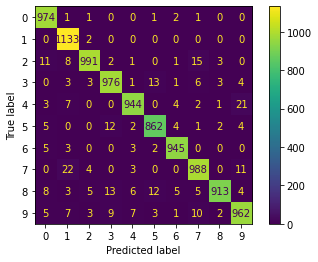

In [ ]:
pipe_knn.fit(nb_X_train,y_train)
y_hat = pipe_knn.predict(nb_X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [ ]:
pipe_knn.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# SVC

In [ ]:
#Flatten to length 784
svc_x_train=X_train[0:10000,:]
svc_y_train=y_train[0:10000]
svc_x_test=X_test[0:2000,:]
svc_y_test=y_test[0:2000]
svc_x_train=svc_x_train.reshape(svc_x_train.shape[0],28*28)
svc_x_test=svc_x_test.reshape(svc_x_test.shape[0],28*28)
#svc_x_train = X_train.flatten().reshape(60000,784)
#svc_x_test = X_test.flatten().reshape(10000,784)
#Normalizing
#svc_x_train=X_train/255
#svc_x_test=X_test/255
# print(svc_x_train.shape)

(10000, 784)


In [ ]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),("classifier",SVC(kernel = 'rbf',gamma=0.1, C = 1))])
pipe_1.fit(svc_x_train, svc_y_train.ravel())

acc = cross_val_score(pipe_1, svc_x_train,svc_y_train.ravel(),cv=2)
print("Training accuracy: {:.2f} %".format(acc.mean()*100))

Training accuracy: 82.68 %


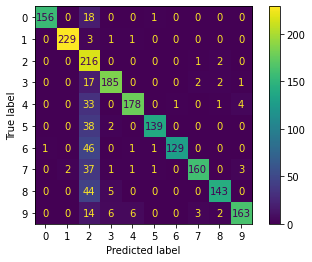

In [ ]:
y_pred=pipe_1.predict(svc_x_test)
ConfusionMatrixDisplay.from_predictions(svc_y_test,y_pred)
plt.show()


In [ ]:
print(metrics.classification_report(svc_y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.46      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.72      0.84       178
           7       0.96      0.78      0.86       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



# Decision Tree and Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split , cross_validate , cross_val_score,ShuffleSplit
# (X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)
X_train = X_train/255
X_test = X_test/255
# print(X_train.shape)
# print(X_test.shape)
cv = ShuffleSplit(n_splits=10, test_size =0.2,random_state=42)
def train_classifiers(estimator , x_train,y_train,cv,name):
  estimator.fit(X_train,y_train)
  cv_train_score = cross_val_score(estimator , X_train,y_train,cv=cv,scoring='precision_macro',n_jobs=5)
  print(f"On an average,{name} model has (f1) precision score of "f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the target")


(60000, 784)
(10000, 784)


In [5]:
def eval(estimator,x_test,y_test):
  y_pred = estimator.predict(X_test)
  print("# Classification Report")
  print(classification_report(y_test,y_pred))
  print("# Confusion Matrix")
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()

In [6]:
decision_tree_pipeline = Pipeline([("classifier",DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline,X_train,y_train.ravel(),cv,"Decision Tree")

On an average,Decision Tree model has (f1) precision score of 0.868 +/- 0.004 on the target


# Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.84      0.84       892
           6       0.88      0.87      0.88       958
           7       0.92      0.90      0.91      1028
           8       0.82      0.80      0.81       974
           9       0.84      0.86      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion Matrix


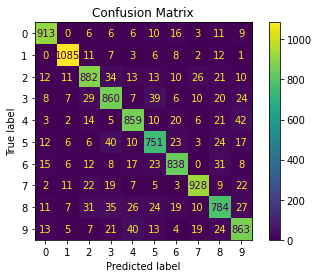

In [7]:
eval(decision_tree_pipeline,X_test,y_test)

In [8]:
randomforest_pipeline = Pipeline([("classifier",RandomForestClassifier())])
train_classifiers(randomforest_pipeline,X_train,y_train.ravel(),cv,"Random Forest Classifier")

On an average,Random Forest Classifier model has (f1) precision score of 0.967 +/- 0.001 on the target


# Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion Matrix


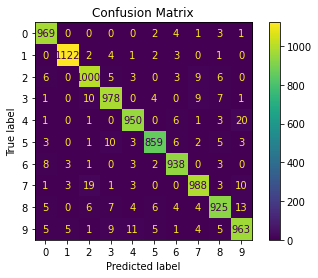

In [9]:
eval(randomforest_pipeline,X_test,y_test)